In [1]:
from __future__ import division, print_function, absolute_import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ethnea_df = pd.read_csv('names_ethnea_genni_country_sample.csv')
ethnea_df

,AUID,Last,First,Ethnea,Genni,PubCountry
0,12872768_1,_Filho_,_Elias_Abdalla_,HISPANIC,M,Brazil
1,12565879_3,_Bou_Abdallah_,_Jad_,ARAB,M,France
2,17569133_1,_Abdel_Aziz_,_Ayman_,ARAB,M,USA
3,11213157_2,_Abdelmoula_,_Salma_,ARAB,F,Tunisia
4,11439058_1,_Abdou_,_Ibrahim_,ARAB,M,Egypt
5,10919608_3,_Abou_El_Fettouh_,_Hazem_,ARAB,M,USA
6,17314740_3,_Aboutaam_,_Rola_,ARAB,F,France
7,16564217_2,_Alvim_de_Abreu_Silva_Rodrigues_,_Aida_Alexandra_,HISPANIC,F,Brazil
8,6339395_2,_Cristina_Affonso_Scaletsky_,_Isabel_,HISPANIC,F,Brazil
9,7796089_2,_Agbenyega_,_Tsiri_,AFRICAN,-,Ghana


In [2]:
#combine first_name and last_name
name_series = ethnea_df['Last'] + ethnea_df['First']
name_series = name_series.replace('_',' ',regex=True)
name_series = name_series.str.strip()
name_series = name_series.str.upper()

#extract ethnicity rows
ethnic_series = ethnea_df.Ethnea.values

In [3]:
# assume ethnic is a document
ethnic_dict = {}
for i,ethnic_i in enumerate(ethnic_series):
    if ethnic_i not in ethnic_dict:
        ethnic_dict[ethnic_i] = []
    # split the name
    split_name = name_series[i].split(' ')
    for name_j in split_name:
        if name_j!='':
            ethnic_dict[ethnic_i].append(name_j)

In [4]:
ethnic_keys = list(ethnic_dict.keys())


In [5]:
def transform_labels(x):
    y = np.zeros(len(ethnic_keys))
    y[ethnic_keys.index(x)]=1
    return y

labels = np.array(list(map(lambda x: transform_labels(x),ethnic_series)))

In [6]:
labels

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [1]:
from imblearn.over_sampling import SMOTE

In [8]:
import pickle
with open('traintest.pickle','rb') as f:
    trainx,trainy,testx,testy = pickle.load(f)

In [21]:
sm = SMOTE(random_state=12, ratio=1.0)
x_res, y_res = sm.fit_sample(trainx,[np.where(x>0)[0][0] for x in trainy])

/home/nnikolaus/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
x_res.shape

(265374, 50)

In [23]:
y_res.shape

(265374,)

In [28]:
np.unique(y_res)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [29]:
yes = np.array([np.where(x>0)[0][0] for x in trainy])

In [30]:
np.unique(yes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [37]:
np.unique(ethnea_df.Ethnea.values).shape

(23,)

In [38]:
with open('traintest-smote.pickle','wb') as f:
    pickle.dump((x_res,y_res),f)

In [45]:
import pickle
with open('traintest.pickle','rb') as f:
    trainx,testx,trainy,testy = pickle.load(f)

In [46]:
trainx.shape

(35653, 50)

In [47]:
trainy.shape

(35653, 23)

In [48]:
testx.shape

(8914, 50)

In [49]:
testy.shape

(8914, 23)

In [51]:
sm = SMOTE(random_state=12, ratio=1.0)
x_res, y_res = sm.fit_sample(trainx,[np.where(x>0)[0][0] for x in trainy])

/home/nnikolaus/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
x_res.shape

(265374, 50)

(array([ 34614.,  23076.,  23076.,  23076.,  23076.,  34614.,  23076.,
         23076.,  23076.,  34614.]),
 array([  0. ,   2.2,   4.4,   6.6,   8.8,  11. ,  13.2,  15.4,  17.6,
         19.8,  22. ]),
 <a list of 10 Patch objects>)

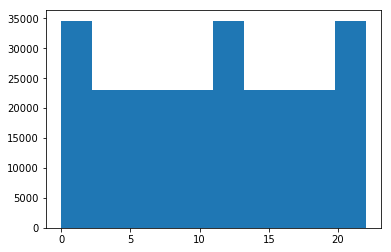

In [56]:
plt.hist(y_res)

In [57]:
with open('traintest-smote.pickle','wb') as f:
    pickle.dump((x_res,y_res),f)

In [9]:
# Start doing DNN for the name embedding
# combine first name and last name
full_name = ethnea_df['First']+ethnea_df['Last']

def extract_structure(word,n_char=4):
    x_struct = []
    word_len = len(word) + n_char
    n_char-=1
    counter = 0
    for i in range(word_len):
        end = i+1
        start = (i - n_char) if (i - n_char) > 0 else 0
        if word[start:end]!='_':
            x_struct.append(word[start:end])
    return x_struct

#extract_structure('_Elias_Abdalla__Filho_')
full_name_struct = full_name.apply(lambda x: extract_structure(x))

struct_dict = {}
for name_struct_i in full_name_struct:
    for struct_j in name_struct_i:
        if struct_j not in struct_dict:
            struct_dict[struct_j]=0
        struct_dict[struct_j]+=1

In [10]:
struct_dict

{'_E': 1076,
 '_El': 303,
 '_Eli': 166,
 'Elia': 21,
 'lias': 19,
 'ias_': 133,
 'as_A': 1,
 's_Ab': 1,
 '_Abd': 85,
 'Abda': 8,
 'bdal': 9,
 'dall': 39,
 'alla': 103,
 'lla_': 227,
 'la__': 585,
 'a__F': 256,
 '__Fi': 175,
 '_Fil': 53,
 'Filh': 11,
 'ilho': 12,
 'lho_': 33,
 'ho_': 81,
 'o_': 2961,
 '': 44567,
 '_J': 2965,
 '_Ja': 675,
 '_Jad': 10,
 'Jad_': 1,
 'ad__': 148,
 'd__B': 194,
 '__Bo': 459,
 '_Bou': 68,
 'Bou_': 1,
 'ou_A': 3,
 'u_Ab': 1,
 'llah': 29,
 'lah_': 32,
 'ah_': 62,
 'h_': 1254,
 '_A': 2590,
 '_Ay': 45,
 '_Aym': 8,
 'Ayma': 4,
 'yman': 32,
 'man_': 704,
 'an__': 2225,
 'n__A': 258,
 '__Ab': 142,
 'Abde': 26,
 'bdel': 29,
 'del_': 80,
 'el_A': 11,
 'l_Az': 5,
 '_Azi': 8,
 'Aziz': 5,
 'ziz_': 8,
 'iz_': 40,
 'z_': 982,
 '_S': 2824,
 '_Sa': 598,
 '_Sal': 138,
 'Salm': 9,
 'alma': 21,
 'lma_': 26,
 'ma__': 162,
 'a__A': 351,
 'delm': 7,
 'elmo': 11,
 'lmou': 4,
 'moul': 3,
 'oula': 9,
 'ula_': 74,
 'la_': 256,
 'a_': 4732,
 '_I': 502,
 '_Ib': 9,
 '_Ibr': 15,
 'Ibra': 

In [11]:
struct_keys = list(struct_dict.keys())

In [12]:
# embedd the structure vocabulary using text embedding and reduce the dimensionality

# convert the names into word structure vector
struct_dict_keys = list(struct_dict.keys())

def transform_structure(name_struct):
    list_structure = []
    for x in name_struct:
        list_structure.append(struct_dict_keys.index(x)+1)
    #add pading 0 for structure less than num_input
    #for i in range(len(list_structure),timesteps):
    #    list_structure.append(0)
    return list_structure   
    #return [*map(lambda x:struct_dict_keys.index(x)+1, name_struct)]

data_source = full_name_struct.apply(lambda x: transform_structure(x))


#]labels = list(map(lambda x:y = np.zeros(len(ethnic_keys));y[ethnic_keys.index(x)]=1,ethnic_series))

#embedding_size = 1000
#embeds = tf.contrib.layers.embed_sequence()

In [13]:
import numpy as np

In [14]:
one_hot = np.zeros([data_source.shape[0],len(struct_keys)],dtype=np.int32 )

In [15]:
for i,x in enumerate(data_source):
    one_hot[i,np.where(np.array(x)>0)] += 1

In [16]:
one_hot

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [85]:
del(one_hot)